In [1]:
import torch
import torchvision.transforms as transforms
from torchvision.transforms.functional import rotate
from torchvision.utils import save_image

# Use my class
import sys
sys.path.append("../")
from load import Load

In [2]:
transformer = [
    transforms.ToTensor()]

Loader  = Load(transformer)
dataset, _ = Loader("..\\train_val_test_dataset\\train\\")
classes = list(dataset.class_to_idx.keys())

In [4]:
class_len_dict = {}
for class_name in classes:
    class_idx = dataset.class_to_idx[class_name]
    class_len = len([
        idx for idx, target_idx in enumerate(dataset.targets)
        if target_idx == class_idx])
    class_len_dict[class_name] = class_len
    
max_class_len = max(list(class_len_dict.values()))

In [12]:
import math

max_agmt_num = 12  # below 7 times data multiplying available

agmt_num_dict = {}
for class_name in classes:
    agmt_num = max_class_len // class_len_dict[class_name]
    if agmt_num > max_agmt_num:
        agmt_num_dict[class_name] = max_agmt_num-1
    else:
        agmt_num_dict[class_name] = agmt_num-1
        
print(agmt_num_dict)

{'L2_10': 2, 'L2_12': 6, 'L2_15': 3, 'L2_20': 6, 'L2_21': 6, 'L2_24': 6, 'L2_25': 0, 'L2_27': 6, 'L2_3': 6, 'L2_30': 6, 'L2_33': 0, 'L2_34': 6, 'L2_39': 6, 'L2_40': 6, 'L2_41': 6, 'L2_44': 6, 'L2_45': 6, 'L2_46': 1, 'L2_50': 6, 'L2_52': 6}


In [31]:
agmt_dict = {
    'L2_10': [('rotate', 0), ('random', agmt_num_dict['L2_10'])],
    'L2_12': [('rotate', 0), ('random', agmt_num_dict['L2_12'])],
    'L2_15': [('rotate', 0), ('random', agmt_num_dict['L2_15'])],
    'L2_20': [('rotate', 0), ('random', agmt_num_dict['L2_20'])],
    'L2_21': [('rotate', 0), ('random', agmt_num_dict['L2_21'])],
    'L2_24': [('rotate', 0), ('random', agmt_num_dict['L2_24'])],
    'L2_25': [('rotate', 0)],
    'L2_27': [('rotate', 0), ('random', agmt_num_dict['L2_27'])],
    'L2_3': [('rotate', 0), ('random', agmt_num_dict['L2_3'])],
    'L2_30': [('rotate', 0), ('random', agmt_num_dict['L2_30'])],
    'L2_33': [('rotate', 0)],
    'L2_34': [('rotate', 0), ('random', agmt_num_dict['L2_34'])],
    'L2_39': [('rotate', 0), ('random', agmt_num_dict['L2_39'])],
    'L2_40': [('rotate', 0), ('random', agmt_num_dict['L2_40'])],
    'L2_41': [('rotate', 0), ('random', agmt_num_dict['L2_41'])],
    'L2_44': [('rotate', 0), ('random', agmt_num_dict['L2_44'])],
    'L2_45': [('rotate', 0), ('random', agmt_num_dict['L2_45'])],
    'L2_46': [('rotate', 0), ('random', agmt_num_dict['L2_46'])],
    'L2_50': [('rotate', 0), ('random', agmt_num_dict['L2_50'])],
    'L2_52': [('rotate', 0), ('random', agmt_num_dict['L2_52'])],
}

In [3]:
import os

save_path = "..\\random_augmented_dataset_v2\\train\\"

def augment_data(dataset, agmt_dict):

    for class_name in list(agmt_dict.keys()):
        # make subdirectory(class)
        os.makedirs(os.path.dirname(save_path + class_name + "\\"), exist_ok=True)
        
        class_idx = dataset.class_to_idx[class_name]
        class_idx_list = [
            idx for idx, target_idx in enumerate(dataset.targets)
            if target_idx == class_idx]

        for idx, data_idx in enumerate(class_idx_list):
            filename, _ = dataset.imgs[data_idx]
            
            data = dataset[data_idx][0]
            if class_name in list(agmt_dict.keys()):
                save_augment_data(data, agmt_dict[class_name], class_name, filename, save_path)

In [4]:
random_transforms = transforms.RandomApply(torch.nn.ModuleList([
    transforms.ColorJitter(),
    transforms.GaussianBlur(kernel_size=(5, 9)),
    transforms.RandomPerspective(),
    transforms.RandomRotation(degrees=(0, 180)),
    transforms.RandomAffine(degrees=(0, 180)),
    transforms.RandomInvert()
    ]), p=1)

import os.path

def save_augment_data(image, agmt_list, class_name, filename, path):
    for agmt in agmt_list:
        agmt_name, param = agmt
        
        if agmt_name == 'rotate' and not os.path.isfile(path + class_name + f"\\rotate_{str(param)}_" + filename.split("\\")[-1]):
            agmt_data = rotate(image, param)
            save_image(agmt_data, path + class_name + f"\\rotate_{str(param)}_" + filename.split("\\")[-1])
        elif agmt_name == 'random':
            for agmt_idx in range(param):
                if not os.path.isfile(path + class_name + f"\\random_{agmt_idx}_" + filename.split("\\")[-1]):
                    agmt_data = random_transforms(image)
                    save_image(agmt_data, path + class_name + f"\\random_{agmt_idx}_" + filename.split("\\")[-1])

In [16]:
augment_data(dataset, agmt_dict)

In [23]:
from os import listdir
import pandas as pd
import matplotlib.pyplot as plt

def draw_class_barplot(
    path: str,
    title: str):
    
    dir_list = listdir(path)

    classLenLst = []
    for class_name in dir_list:
        classLenLst.append(len(listdir(path+class_name)))

    df_dict = dict()
    df_dict["name"] = dir_list
    df_dict["count"] = classLenLst

    df= pd.DataFrame(df_dict)

    plt.figure(figsize=(100,100))
    df.plot(kind="bar", x='name', y='count')
    plt.xlabel("class name")
    plt.ylabel("count")
    plt.title(title)

    return df

전체 데이터의 수: 40064


<Figure size 10000x10000 with 0 Axes>

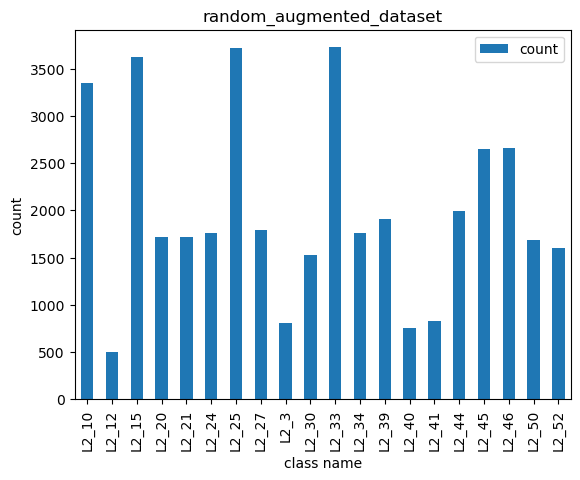

In [ ]:
df = draw_class_barplot(r'..\\random_augmented_dataset_v2\\train\\', 'random_augmented_dataset_v2')

print(f"전체 데이터의 수: {df['count'].sum(0)}")